## Import libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#Load dataset
df = pd.read_csv("Diabetes.csv")
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Split the dataset into features (X) and target variable (y)

X = df.drop('diabetes', axis = 1)
y = df['diabetes']

In [5]:
print(X)
print(y)

     pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age
0              6      148         72       35        0  33.6  0.627   50
1              1       85         66       29        0  26.6  0.351   31
2              8      183         64        0        0  23.3  0.672   32
3              1       89         66       23       94  28.1  0.167   21
4              0      137         40       35      168  43.1  2.288   33
..           ...      ...        ...      ...      ...   ...    ...  ...
763           10      101         76       48      180  32.9  0.171   63
764            2      122         70       27        0  36.8  0.340   27
765            5      121         72       23      112  26.2  0.245   30
766            1      126         60        0        0  30.1  0.349   47
767            1       93         70       31        0  30.4  0.315   23

[768 rows x 8 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
N

In [8]:
# Split the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [11]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
print(X_train)
print('\n', X_test)

[[-0.52639686 -1.15139792 -3.75268255 ... -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 ... -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  ... -0.42452187  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.62029661  0.89659009 ...  1.76054443  1.981245
   0.44308379]
 [-1.13052335  0.62935353 -3.75268255 ...  1.34680407 -0.78487662
  -0.33992901]
 [-1.13052335  0.12949347  1.43720319 ... -1.22614383 -0.61552223
  -1.03594038]]

 [[ 0.49124165 -0.72667791 -0.44147615 ...  0.23374785 -0.17094071
   0.66661154]
 [-0.63368347 -0.28534901  0.31890843 ...  0.43537945 -1.08608042
  -1.07335756]
 [-0.63368347 -0.41144298 -0.17310512 ... -0.14579397 -1.05362866
  -1.07335756]
 ...
 [ 1.05370422 -0.82124838  0.18472291 ...  0.56584695  0.00754398
   1.77386461]
 [-0.63368347  0.78644972  0.09526591 ... -0.47789306 -0.47274211
  -0.44064153]
 [ 1.05370422 -1.48324172  0.09526591 ...  0.38793672  0.72148276
   0.35025352]]


In [16]:
# Create Logistic Regression model 
model = LogisticRegression()

In [19]:
# Train the model using the training sets
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Predict on the test set
y_pred = model.predict(X_test)

In [22]:
#Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7857142857142857


In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(conf_matrix)

Confusion Matrix : 
[[86 13]
 [20 35]]


<Axes: >

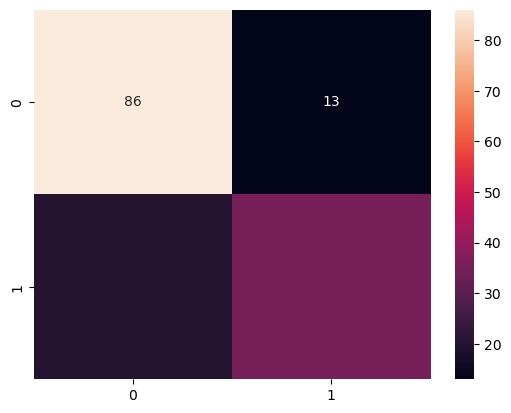

In [46]:

sns.heatmap(conf_matrix, annot=True)

In [47]:
report = classification_report(y_test, y_pred)

print("Classification Report")
print(report)

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



<hr>

1. Extract a random row using sample function
2. Separate x and y
3. Standardize X
4. Predict

In [96]:
def diabeticModel2 (row) :

    global scaler, model 
    #separate x and y
    X_sample = row.drop('diabetes', axis=1)
    y_sample = row['diabetes']
    
    # Standardize X
    X_sample = scaler.transform(X_sample)

    # Predict = model.predict(X_sample)
    y_pred = model.predict(X_sample)
    print("Predicted Class : ", y_pred)

    if(y_pred == 0):
        return "Non-Diabetic"
    else : 
        return "Diabetic"
    

In [119]:
# Extract random row 
row = df.sample(n=1)
print(row)
result = diabeticModel2(row)
print("\nResult")
print(result)

     pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
767            1       93         70       31        0  30.4  0.315   23   

     diabetes  
767         0  
Predicted Class :  [0]

Result
Non-Diabetic


In [126]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [132]:
def diabeticModel3 (row) :

    global scaler, model 
    #separate x and y
    # X_sample = row.drop('diabetes', axis=1)
    # y_sample = row['diabetes']
    
    # Standardize X
    X_sample = scaler.transform(row)

    # Predict = model.predict(X_sample)
    y_pred = model.predict(X_sample)
    print("Predicted Class : ", y_pred)

    if(y_pred == 0):
        return "Non-Diabetic"
    else : 
        return "Diabetic"
    

In [133]:
# taking a new patient input data
new_row = {}
for feature in df.columns:
    if(feature  == 'diabetes'):
        continue
        
    value = input(f"Enter value for {feature}: ({df[feature].dtype}) : ")
    new_row[feature] = [value] #stores value as list 

new_row = pd.DataFrame(new_row)
print(new_row)
result = diabeticModel3(new_row)
print("\nResult (80% accurate) ")
print(result)

Enter value for pregnancies: (int64) :  5
Enter value for glucose: (int64) :  56
Enter value for diastolic: (int64) :  48
Enter value for triceps: (int64) :  64
Enter value for insulin: (int64) :  47
Enter value for bmi: (float64) :  13
Enter value for dpf: (float64) :  66
Enter value for age: (int64) :  77


  pregnancies glucose diastolic triceps insulin bmi dpf age
0           5      56        48      64      47  13  66  77
Predicted Class :  [1]

Result
Diabetic
